In [90]:
import pandas as pd 
import numpy as np 
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
pd.options.display.max_rows = 10

In [92]:
df1 = pd.read_csv('city_data_Rabat.csv', index_col='year')
df1.head()

,city,country,avg_temp
year,,,
1753,Rabat,Morocco,17.31
1754,Rabat,Morocco,17.47
1755,Rabat,Morocco,17.16
1756,Rabat,Morocco,17.53
1757,Rabat,Morocco,17.42


In [93]:
df1['MA-RABAT-10'] = df1.iloc[:,2].rolling(window=10).mean().round(2)
#df1

In [94]:
# plt.figure(figsize=[15,10])
# plt.grid(True)
# plt.plot(df1['MA-RABAT-10'],label='Rabat moving average 10')
# plt.legend(loc=2)

In [95]:
df2 = pd.read_csv('Global_data.csv', index_col='year')
# df2.head()

In [96]:
df2.drop([1750,1751,1752,2014,2015], inplace=True)

In [97]:
df2['Global-MA-10'] = df2.iloc[:,0].rolling(window=10).mean().round(2)
# df2

In [98]:
# plt.figure(figsize=[15,10])
# plt.grid(True)
# plt.plot(df2['Global-MA-10'],label='Global moving average 10')
# plt.legend(loc=2)

In [99]:
Rabat_MA = df1.iloc[:, 3]

In [100]:
Global_MA = df2.iloc[:,1]

In [101]:
Trend = pd.DataFrame(data=[Rabat_MA, Global_MA]).T
# Trend

In [102]:
Trend.iloc[:, :2][Trend['MA-RABAT-10'] == Trend['MA-RABAT-10'].min()]

,MA-RABAT-10,Global-MA-10
year,,
1816,16.36,7.33


In [103]:
Trend.iloc[:, :2][Trend['MA-RABAT-10'] == Trend['MA-RABAT-10'].max()]

,MA-RABAT-10,Global-MA-10
year,,
2013,18.38,9.56


In [104]:
Trend.iloc[:, :2][Trend['Global-MA-10'] == Trend['Global-MA-10'].min()]

,MA-RABAT-10,Global-MA-10
year,,
1817,16.39,7.2


In [105]:
Trend.iloc[:, :2][Trend['Global-MA-10'] == Trend['Global-MA-10'].max()]

,MA-RABAT-10,Global-MA-10
year,,
2013,18.38,9.56


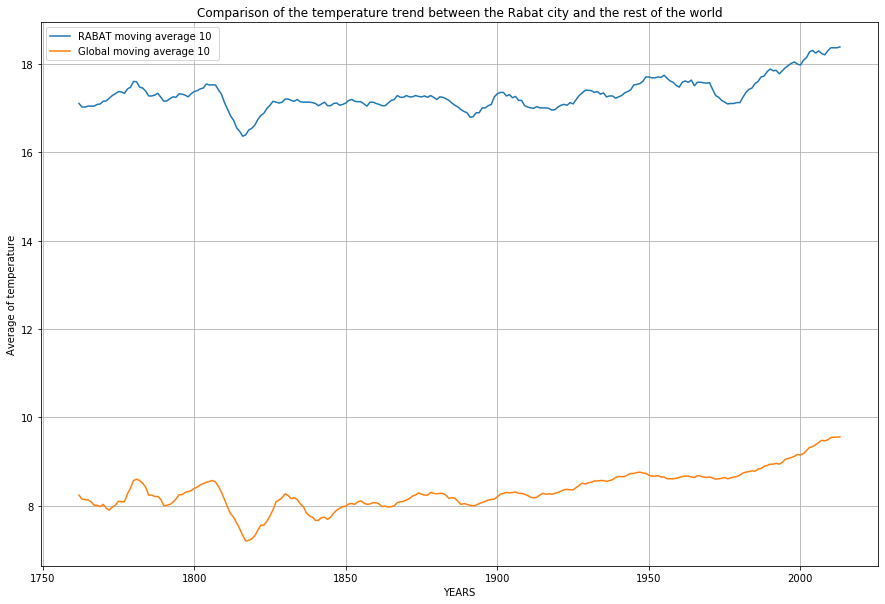

In [106]:
plt.figure(figsize=[15,10])
plt.title('Comparison of the temperature trend between the Rabat city and the rest of the world')
plt.xlabel('YEARS')
plt.ylabel('Average of temperature')
plt.grid(True)
plt.plot(Trend['MA-RABAT-10'],label='RABAT moving average 10 ')
plt.plot(Trend['Global-MA-10'],label='Global moving average 10')
plt.legend(loc=2)

In [107]:
from numpy import mean
from numpy import std
from numpy import cov
from scipy.stats import pearsonr

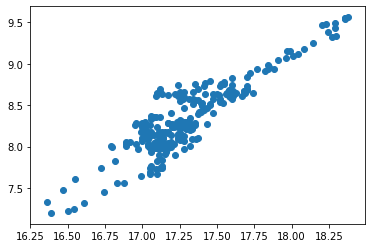

In [108]:
plt.scatter(Rabat_MA, Global_MA)

In [109]:
cov(Rabat_MA.iloc[9:], Global_MA.iloc[9:]).round(2)

array([[0.13, 0.14],
       [0.14, 0.19]])

In [110]:
np.corrcoef(Rabat_MA.iloc[9:], Global_MA.iloc[9:]).round(3)

array([[1.   , 0.901],
       [0.901, 1.   ]])

In [111]:
corr, _ = pearsonr(Rabat_MA.iloc[9:], Global_MA.iloc[9:])
corr

0.9013615560106899

In [112]:
df3 = pd.read_csv('paris_data.csv', index_col='year')
df3.head()

,city,country,avg_temp
year,,,
1743,Paris,France,7.65
1744,Paris,France,11.48
1745,Paris,France,4.73
1746,Paris,France,NaN
1747,Paris,France,NaN


In [113]:
df3.isnull().sum()

city        0
country     0
avg_temp    4
dtype: int64

In [114]:
df3.iloc[:, :3][df3['avg_temp'].isnull() == True]

,city,country,avg_temp
year,,,
1746,Paris,France,NaN
1747,Paris,France,NaN
1748,Paris,France,NaN
1749,Paris,France,NaN


In [115]:
paris = df3.drop(df3.index[:10])

In [116]:
paris

,city,country,avg_temp
year,,,
1753,Paris,France,10.40
1754,Paris,France,10.15
1755,Paris,France,9.84
1756,Paris,France,10.20
1757,Paris,France,10.02
...,...,...,...
2009,Paris,France,11.46
2010,Paris,France,10.41
2011,Paris,France,12.33


In [117]:
df4 = pd.read_csv('london_data.csv', index_col='year')
df4.head()

,city,country,avg_temp
year,,,
1743,London,United Kingdom,7.54
1744,London,United Kingdom,10.34
1745,London,United Kingdom,4.13
1746,London,United Kingdom,NaN
1747,London,United Kingdom,NaN


In [118]:
df4.isnull().sum()

city        0
country     0
avg_temp    4
dtype: int64

In [119]:
df4.iloc[:, :3][df3['avg_temp'].isnull() == True]

,city,country,avg_temp
year,,,
1746,London,United Kingdom,NaN
1747,London,United Kingdom,NaN
1748,London,United Kingdom,NaN
1749,London,United Kingdom,NaN


In [120]:
london = df4.drop(df3.index[:10])
london

,city,country,avg_temp
year,,,
1753,London,United Kingdom,9.42
1754,London,United Kingdom,9.20
1755,London,United Kingdom,8.95
1756,London,United Kingdom,9.42
1757,London,United Kingdom,9.34
...,...,...,...
2009,London,United Kingdom,10.52
2010,London,United Kingdom,9.38
2011,London,United Kingdom,11.19


In [121]:
df5 = pd.read_csv('rome_data.csv', index_col='year')
df5.head()

,city,country,avg_temp
year,,,
1743,Rome,Italy,8.25
1744,Rome,Italy,13.27
1745,Rome,Italy,5.15
1746,Rome,Italy,NaN
1747,Rome,Italy,NaN


In [122]:
df5.isnull().sum()

city        0
country     0
avg_temp    4
dtype: int64

In [123]:
df5.iloc[:, :3][df5['avg_temp'].isnull() == True]

,city,country,avg_temp
year,,,
1746,Rome,Italy,NaN
1747,Rome,Italy,NaN
1748,Rome,Italy,NaN
1749,Rome,Italy,NaN


In [124]:
rome = df5.drop(df5.index[:10])
rome

,city,country,avg_temp
year,,,
1753,Rome,Italy,11.96
1754,Rome,Italy,11.79
1755,Rome,Italy,11.57
1756,Rome,Italy,12.13
1757,Rome,Italy,11.80
...,...,...,...
2009,Rome,Italy,13.28
2010,Rome,Italy,12.63
2011,Rome,Italy,13.46


In [125]:
paris['MA-PARIS-10'] = paris.iloc[:,2].rolling(window=10).mean().round(2)
paris

,city,country,avg_temp,MA-PARIS-10
year,,,,
1753,Paris,France,10.40,NaN
1754,Paris,France,10.15,NaN
1755,Paris,France,9.84,NaN
1756,Paris,France,10.20,NaN
1757,Paris,France,10.02,NaN
...,...,...,...,...
2009,Paris,France,11.46,11.61
2010,Paris,France,10.41,11.47
2011,Paris,France,12.33,11.57


In [126]:
london['MA-LONDON-10'] = london.iloc[:,2].rolling(window=10).mean().round(2)
london

,city,country,avg_temp,MA-LONDON-10
year,,,,
1753,London,United Kingdom,9.42,NaN
1754,London,United Kingdom,9.20,NaN
1755,London,United Kingdom,8.95,NaN
1756,London,United Kingdom,9.42,NaN
1757,London,United Kingdom,9.34,NaN
...,...,...,...,...
2009,London,United Kingdom,10.52,10.66
2010,London,United Kingdom,9.38,10.55
2011,London,United Kingdom,11.19,10.65


In [127]:
rome['MA-ROME-10'] = rome.iloc[:,2].rolling(window=10).mean().round(2)
rome

,city,country,avg_temp,MA-ROME-10
year,,,,
1753,Rome,Italy,11.96,NaN
1754,Rome,Italy,11.79,NaN
1755,Rome,Italy,11.57,NaN
1756,Rome,Italy,12.13,NaN
1757,Rome,Italy,11.80,NaN
...,...,...,...,...
2009,Rome,Italy,13.28,13.08
2010,Rome,Italy,12.63,13.00
2011,Rome,Italy,13.46,13.02


In [128]:
PARIS_MA = paris.iloc[:, 3]
#PARIS_MA

In [129]:
LONDON_MA = london.iloc[:, 3]
#LONDON_MA

In [130]:
ROME_MA = rome.iloc[:, 3]
#ROME_MA

In [131]:
MA_M_10 = pd.DataFrame(data=[Rabat_MA, Global_MA, PARIS_MA, LONDON_MA, ROME_MA]).T
MA_M_10

,MA-RABAT-10,Global-MA-10,MA-PARIS-10,MA-LONDON-10,MA-ROME-10
year,,,,,
1753,NaN,NaN,NaN,NaN,NaN
1754,NaN,NaN,NaN,NaN,NaN
1755,NaN,NaN,NaN,NaN,NaN
1756,NaN,NaN,NaN,NaN,NaN
1757,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2009,18.29,9.49,11.61,10.66,13.08
2010,18.36,9.54,11.47,10.55,13.00
2011,18.36,9.55,11.57,10.65,13.02


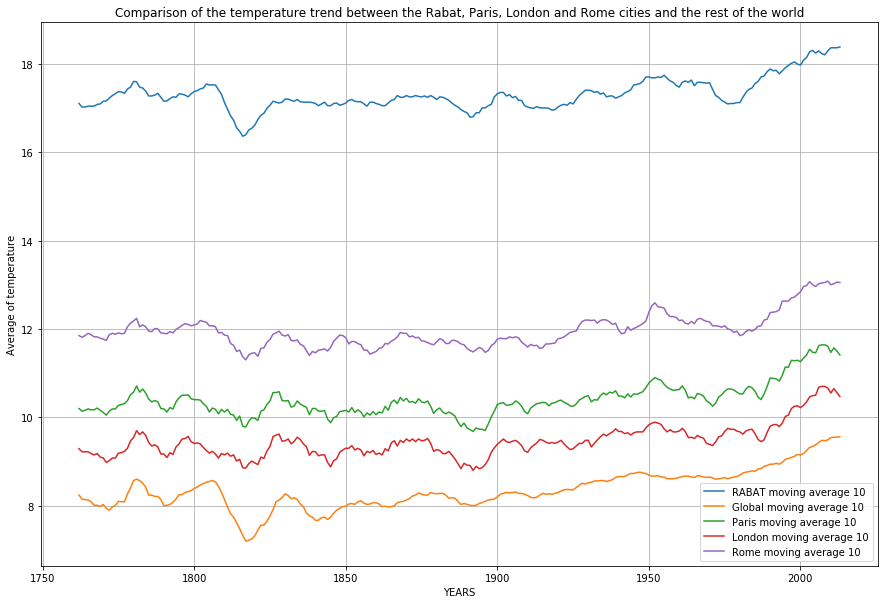

In [132]:
plt.figure(figsize=[15,10])
plt.title('Comparison of the temperature trend between the Rabat, Paris, London and Rome cities and the rest of the world')
plt.xlabel('YEARS')
plt.ylabel('Average of temperature')
plt.grid(True)
plt.plot(MA_M_10['MA-RABAT-10'],label='RABAT moving average 10 ')
plt.plot(MA_M_10['Global-MA-10'],label='Global moving average 10')
plt.plot(MA_M_10['MA-PARIS-10'],label='Paris moving average 10')
plt.plot(MA_M_10['MA-LONDON-10'],label='London moving average 10')
plt.plot(MA_M_10['MA-ROME-10'],label='Rome moving average 10')
plt.legend(loc=0)